In [1]:
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

from sklearn.externals.six import StringIO

from IPython.display import Image

from pydot import graph_from_dot_data

import pandas as pd
import numpy as np


C:\Users\hakng\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


#### 1. Load the Iris dataset from SKLearn

Load the Iris dataset from [SKLearn's](https://scikit-learn.org/stable/datasets/index.html) datasets package. The Iris dataset is a small collection of 150 observations over 3 classes of flowers (Setosa, Versicolour, Virginica). Each instance consist of 4 numeric features, the widths and heights of the flower's [sepal](https://en.wikipedia.org/wiki/Sepal) and [petal](https://en.wikipedia.org/wiki/Petal).  We will build a decision tree classifier to determine the kind of flower given the dimensions of the flower's sepal and petal.

In [2]:
iris = load_iris()

##### 1.1 Extract the features (dimensions of flower) into a dataframe

In [3]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)

X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


##### 1.2 Extract target variable (type of flower) into a list

In [4]:
y = pd.Categorical.from_codes(iris.target, iris.target_names)

y

[setosa, setosa, setosa, setosa, setosa, ..., virginica, virginica, virginica, virginica, virginica]
Length: 150
Categories (3, object): [setosa, versicolor, virginica]

Instead of using categorical data, we will encode the targets using digits (i.e. setosa=0, versicolor=1, virginica=2). This is so that we can create a confusion matrix later. We will use the [<b>get_dummies</b>](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) method in the <b>pandas</b> library to encode the target variable as digits.

In [5]:
y = pd.get_dummies(y)

y

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


##### 2. Split dataset for training and testing

Using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from <b>sklearn</b>, we'll split the dataset into training and testing datasets.  We can control the size of the testing by using the <b>test_size</b> parameter.  For this exercise, we'll leave it at the default 0.25 (25% of the original dataset).

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19)

X_train.shape, X_test.shape

((112, 4), (38, 4))

In [7]:
y_train.shape, y_test.shape

((112, 3), (38, 3))

##### 3. Create and train an instance of the DecisionTreeClassifer

The Decision Tree model is a supervised machine learning algorithm.  To train the model, we pass in 

In [8]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [9]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, feature_names=iris.feature_names)

(graph, ) = graph_from_dot_data(dot_data.getvalue())

In [17]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\hakng\\Anaconda3\\Library\\bin\graphviz'

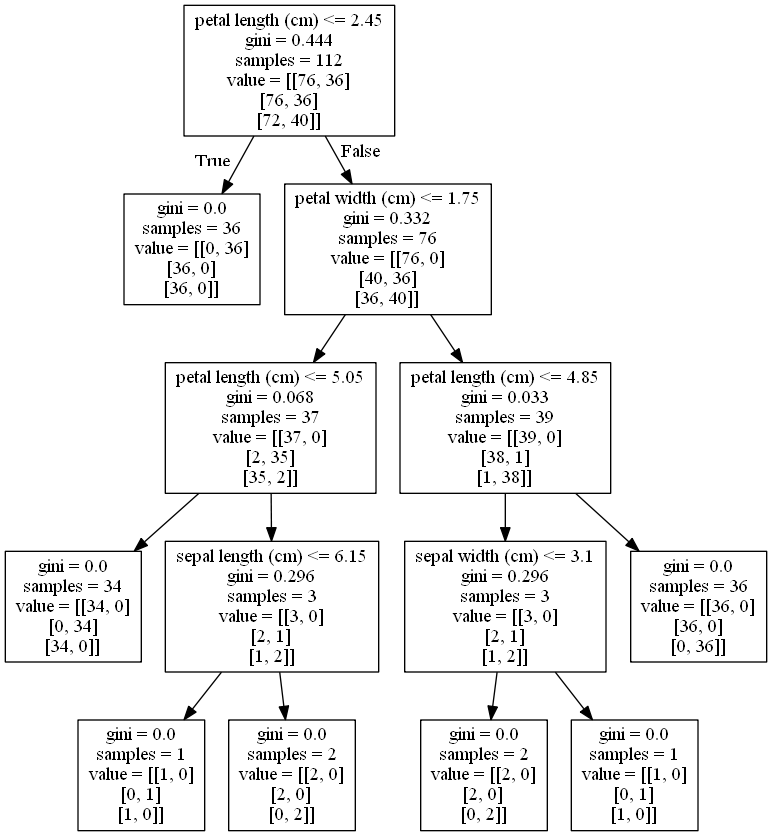

In [21]:
Image(graph.create_png())